In [106]:
# pip install ucimlrepo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [76]:
# from ucimlrepo import fetch_ucirepo 

# # Importing the dataset into my code
# # fetch dataset 
# diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
  
# # data (as pandas dataframes) 
# X = diabetes_130_us_hospitals_for_years_1999_2008.data.features 
# y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets 
  
# # metadata 
# print(diabetes_130_us_hospitals_for_years_1999_2008.metadata) 
  
# # variable information 
# print(diabetes_130_us_hospitals_for_years_1999_2008.variables) 

In [ ]:
# variables = diabetes_130_us_hospitals_for_years_1999_2008.variables
# variables

In [2]:
from zipfile import ZipFile

with ZipFile('diabetes+130-us+hospitals+for+years+1999-2008.zip', 'r') as zips:

 # printing all the contents of the zip file

  zips.printdir()

# extracting all the files in current working directory 

  zips.extractall()

File Name                                             Modified             Size
diabetic_data.csv                              2023-07-12 14:38:42     19159383
IDS_mapping.csv                                2023-07-12 14:38:58         2547


In [90]:
dataset = pd.read_csv('diabetic_data.csv')

In [91]:
dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [92]:
ids = pd.read_csv('IDS_mapping.csv')
ids

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [94]:
# mapping readmission to 2 categories:
# The most interesting label is whether patients were readmitted within less than 30 days

In [95]:
admission_mapped = {'NO':0,
          '>30':0,
          '<30':1}

dataset.readmitted = dataset.readmitted.replace(admission_mapped)

In [96]:
# replacing values based on the IDS and organizing some of the strings, e.g changing "?" to np.nan

In [97]:
mapped_race = {"Asian":"Other","Hispanic":"Other"}
dataset.race = dataset.race.replace(mapped_race)

In [98]:
# dataset.age = dataset.age.replace({"[70-80)":75,
#                          "[60-70)":65,
#                          "[50-60)":55,
#                          "[80-90)":85,
#                          "[40-50)":45,
#                          "[30-40)":35,
#                          "[90-100)":95,
#                          "[20-30)":25,
#                          "[10-20)":15,
#                          "[0-10)":5})

In [99]:
# dataset.weight=dataset.weight.replace({"[75-100)":87.5,
#                              "[50-75)":62.5,
#                              "[100-125)":112.5,
#                              "[125-150)":137.5,
#                              "[25-50)":37.5,
#                              "[0-25)":12.5,
#                              "[150-175)":162.5,
#                              "[175-200)":187.5,
#                              ">200":212.5,
#                              "?": np.nan})

In [100]:
mapped = {1:"Emergency",
          2:"Urgent",
          3:"Elective",
          4:"New Born",
          5:np.nan,
          6:np.nan,
          7:"Trauma Center",
          8:np.nan}

dataset.admission_type_id = dataset.admission_type_id.replace(mapped)

In [101]:
mapped_discharge = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Transferred to Hospital",
                    3:"Other",4:"Other",
                    5:"Other",7:"Other",
                    9:"Transferred to Hospital",
                    10:"Transferred to Hospital",
                    11:"Other",12:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Transferred to Hospital",23:"Transferred to Hospital",
                    24:"Other",27:"Other",
                    28:"Transferred to Hospital",29:"Transferred to Hospital"}

dataset["discharge_disposition_id"] = dataset["discharge_disposition_id"].replace(mapped_discharge)

In [102]:
mapped_admission_source_id = {1:"Referral",2:"Referral",3:"Referral", 
                              4:"Transfer",5:"Transfer",6:"Transfer",7:"Emergency",
                              8:"Other",10:"Transfer",11:"Other",12:"Other",13:"Other",14:"Other",18:"Transfer",19:"Other",
                              9:np.nan,15:np.nan,17:np.nan,20:np.nan,21:np.nan,
                              22:"Transfer",23:"Other",24:"Other",25:"Transfer",26:"Transfer"}

dataset.admission_source_id = dataset.admission_source_id.replace(mapped_admission_source_id)

In [103]:
dataset=dataset.replace({"?": np.nan})

In [104]:
dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,NaN,NaN,Referral,1,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,Emergency,Discharged to Home,Emergency,3,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,Emergency,Discharged to Home,Emergency,2,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,Emergency,Discharged to Home,Emergency,2,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,Emergency,Discharged to Home,Emergency,1,...,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,Emergency,Other,Emergency,3,...,No,Down,No,No,No,No,No,Ch,Yes,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,Emergency,Other,Transfer,5,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,Emergency,Discharged to Home,Emergency,1,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,Urgent,Other,Emergency,10,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [105]:
X = dataset.drop(["readmitted","encounter_id","patient_nbr"], axis=1) # drop labels for X as well as ids
y = dataset[["readmitted"]].copy()

In [106]:
X

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,NaN,NaN,Referral,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,Emergency,Discharged to Home,Emergency,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,Emergency,Discharged to Home,Emergency,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,Emergency,Discharged to Home,Emergency,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,Emergency,Discharged to Home,Emergency,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,Emergency,Other,Emergency,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,Emergency,Other,Transfer,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,Emergency,Discharged to Home,Emergency,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,Urgent,Other,Emergency,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [107]:
y

,readmitted
0,0
1,0
2,0
3,0
4,0
...,...
101761,0
101762,0
101763,0
101764,0


## Creating a test set

In [108]:
# without stratification for comparison:
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [110]:
def readmitted_cat_proportions(data):
    return data["readmitted"].value_counts() / len(data)

In [111]:
compare_props = pd.DataFrame({
    "Overall": readmitted_cat_proportions(dataset),
    "Stratified train set": readmitted_cat_proportions(y_train),
    "Stratified test set": readmitted_cat_proportions(y_test),
    "Random train set without Stratification": readmitted_cat_proportions(y_train_random),
    "Random test set without Stratification": readmitted_cat_proportions(y_test_random),
}).sort_index()

In [112]:
compare_props

,Overall,Stratified train set,Stratified test set,Random train set without Stratification,Random test set without Stratification
readmitted,,,,,
0,0.888401,0.888395,0.888425,0.888567,0.887737
1,0.111599,0.111605,0.111575,0.111433,0.112263


In [113]:
compare_props["Rand. test %error"] = 100 * compare_props["Random test set without Stratification"] / compare_props["Overall"] - 100
compare_props["Strat. test %error"] = 100 * compare_props["Stratified test set"] / compare_props["Overall"] - 100

In [114]:
compare_props

,Overall,Stratified train set,Stratified test set,Random train set without Stratification,Random test set without Stratification,Rand. test %error,Strat. test %error
readmitted,,,,,,,
0,0.888401,0.888395,0.888425,0.888567,0.887737,-0.074717,0.002706
1,0.111599,0.111605,0.111575,0.111433,0.112263,0.594796,-0.021540


In [115]:
# we can see that with the stratification, the distribution of the target is more similar between the train and test sets, 
# and both are more similar to the entire dataset, and the test %error compared to the entire dataset is lower after stratification.

In [116]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

## EDA - Discover and Visualize the Training Data to Gain Insights

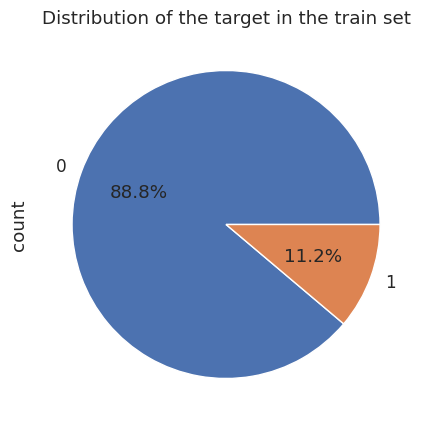

In [117]:
y_train.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Distribution of the target in the train set")
plt.show()

In [118]:
y_train.readmitted.value_counts()

readmitted
0    72326
1     9086
Name: count, dtype: int64

In [119]:
y_train.readmitted.value_counts(normalize = True)*100

readmitted
0    88.839483
1    11.160517
Name: proportion, dtype: float64

In [120]:
# The target distribution is imbalanced, the minority class is <30.

In [121]:
percent_missing = X_train.isnull().sum() * 100 / len(X_train)
missing_value_X_train = pd.DataFrame({'percent_missing': percent_missing})
missing_value_X_train.sort_values(by=['percent_missing'], ascending=False)[:10]

,percent_missing
weight,96.934113
max_glu_serum,94.740333
A1Cresult,83.271508
medical_specialty,49.202820
payer_code,39.499091
admission_type_id,10.213482
admission_source_id,6.914214
discharge_disposition_id,4.593917
race,2.224488
diag_3,1.395372


In [35]:
# variables with a large % of missing values (more than 30%) will be excluded as the important features.

In [36]:
# I'll start by working with some of the variables - all numerical and some of the categorical (not looking yet at features for medications)

In [122]:
train_set = pd.concat([X_train, y_train], axis=1, join="inner")

In [123]:
train_set

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
46943,AfricanAmerican,Female,[70-80),NaN,Emergency,Transferred to Hospital,Transfer,11,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,0
60886,Other,Male,[50-60),NaN,Emergency,Discharged to Home,Emergency,1,MD,Nephrology,...,No,Down,No,No,No,No,No,Ch,Yes,0
34417,Caucasian,Male,[60-70),NaN,Urgent,Discharged to Home,Referral,5,UN,InternalMedicine,...,No,Steady,No,No,No,No,No,No,Yes,0
57371,AfricanAmerican,Female,[50-60),NaN,Emergency,Discharged to Home,Emergency,1,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,0
19626,AfricanAmerican,Female,[30-40),NaN,Emergency,Other,Transfer,10,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65564,Caucasian,Male,[80-90),NaN,Emergency,Discharged to Home,Emergency,6,MC,NaN,...,No,No,No,No,No,No,No,No,No,0
87702,Caucasian,Female,[80-90),NaN,Emergency,Other,Emergency,5,MC,NaN,...,No,No,No,No,No,No,No,No,Yes,0
98373,Caucasian,Male,[70-80),NaN,Emergency,Transferred to Hospital,Emergency,5,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,0
63311,AfricanAmerican,Male,[40-50),NaN,Elective,Discharged to Home,Referral,7,HM,Nephrology,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [124]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81412 entries, 46943 to 78652
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      79601 non-null  object
 1   gender                    81412 non-null  object
 2   age                       81412 non-null  object
 3   weight                    2496 non-null   object
 4   admission_type_id         73097 non-null  object
 5   discharge_disposition_id  77672 non-null  object
 6   admission_source_id       75783 non-null  object
 7   time_in_hospital          81412 non-null  int64 
 8   payer_code                49255 non-null  object
 9   medical_specialty         41355 non-null  object
 10  num_lab_procedures        81412 non-null  int64 
 11  num_procedures            81412 non-null  int64 
 12  num_medications           81412 non-null  int64 
 13  number_outpatient         81412 non-null  int64 
 14  number_emergency       

In [125]:
numerical = [
  'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'
]
categorical = [
  'readmitted', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'change'
]

diabetes = train_set[numerical + categorical]
diabetes.shape

(81412, 16)

In [126]:
diabetes

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,change
46943,11,45,1,18,0,0,0,9,0,AfricanAmerican,Female,[70-80),Emergency,Transferred to Hospital,Transfer,Ch
60886,1,32,4,15,2,0,0,5,0,Other,Male,[50-60),Emergency,Discharged to Home,Emergency,Ch
34417,5,46,2,16,0,0,0,5,0,Caucasian,Male,[60-70),Urgent,Discharged to Home,Referral,No
57371,1,36,0,11,0,0,0,4,0,AfricanAmerican,Female,[50-60),Emergency,Discharged to Home,Emergency,Ch
19626,10,54,3,16,0,0,0,7,0,AfricanAmerican,Female,[30-40),Emergency,Other,Transfer,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65564,6,57,0,13,1,0,2,9,0,Caucasian,Male,[80-90),Emergency,Discharged to Home,Emergency,No
87702,5,69,0,16,0,0,1,9,0,Caucasian,Female,[80-90),Emergency,Other,Emergency,No
98373,5,24,0,19,0,0,0,9,0,Caucasian,Male,[70-80),Emergency,Transferred to Hospital,Emergency,Ch
63311,7,20,3,22,0,1,1,9,0,AfricanAmerican,Male,[40-50),Elective,Discharged to Home,Referral,Ch


Analysing numerical variables

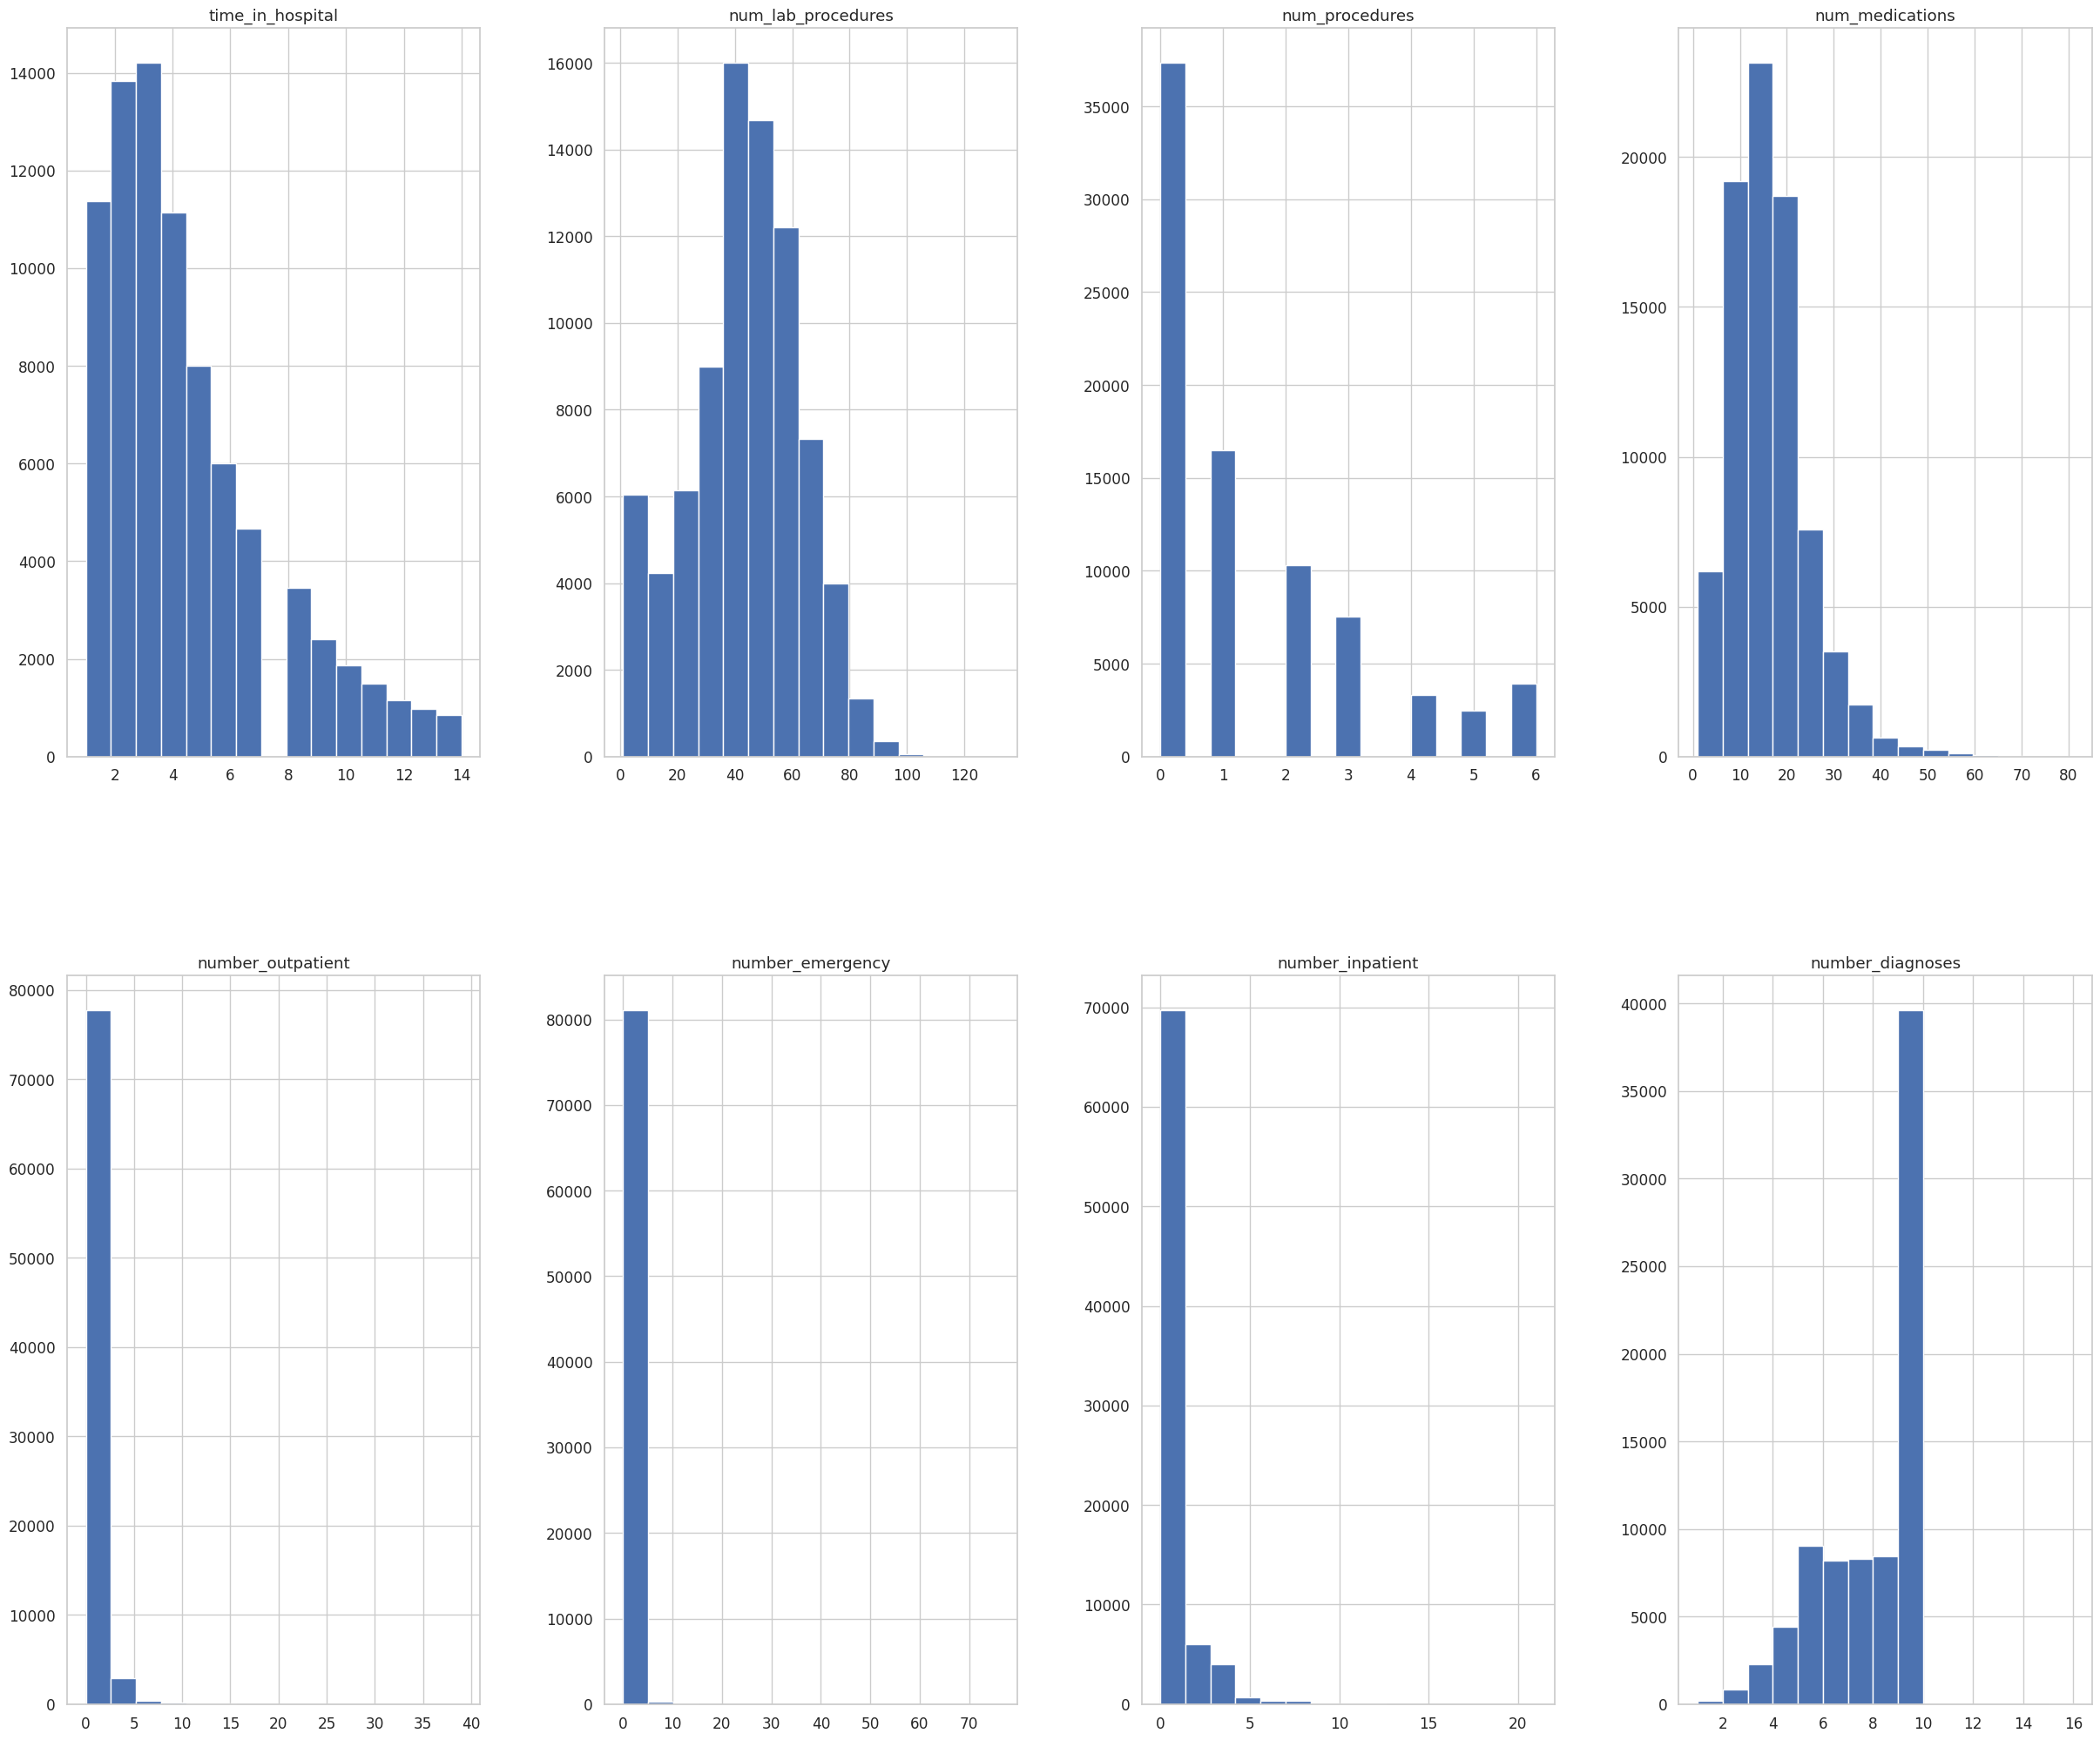

In [127]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

diabetes[numerical].hist(bins=15, figsize=(30, 25), layout=(2, 4));

In [128]:
# We can learn a lot of information from this visualization.
# time_in_hospital (number of days between admission and discharge) and num_medications (number of distinct generic names administered during the encounter) 
# are heavily skewed right. I'll keep these features skewed and will not apply data transformation techniques, as we learned that some models such as decision trees can handle skewed data.
# Most patients stayed 2-3 days in the hospital.
# Most patients have 40-50 lab procedures.
# Most patients have no outpatient nor inpatient visits in the year preceding the encounter.
# Most patients have no emergency visits in the year preceding the encounter.

In [129]:
feature_variance = diabetes[numerical].var()
variance_numerical_X = pd.DataFrame({'feature_variance': feature_variance})
variance_numerical_X.sort_values(by=['feature_variance'])

,feature_variance
number_emergency,0.934538
number_inpatient,1.602235
number_outpatient,1.608720
num_procedures,2.899056
number_diagnoses,3.732714
time_in_hospital,8.922092
num_medications,65.930514
num_lab_procedures,387.825835


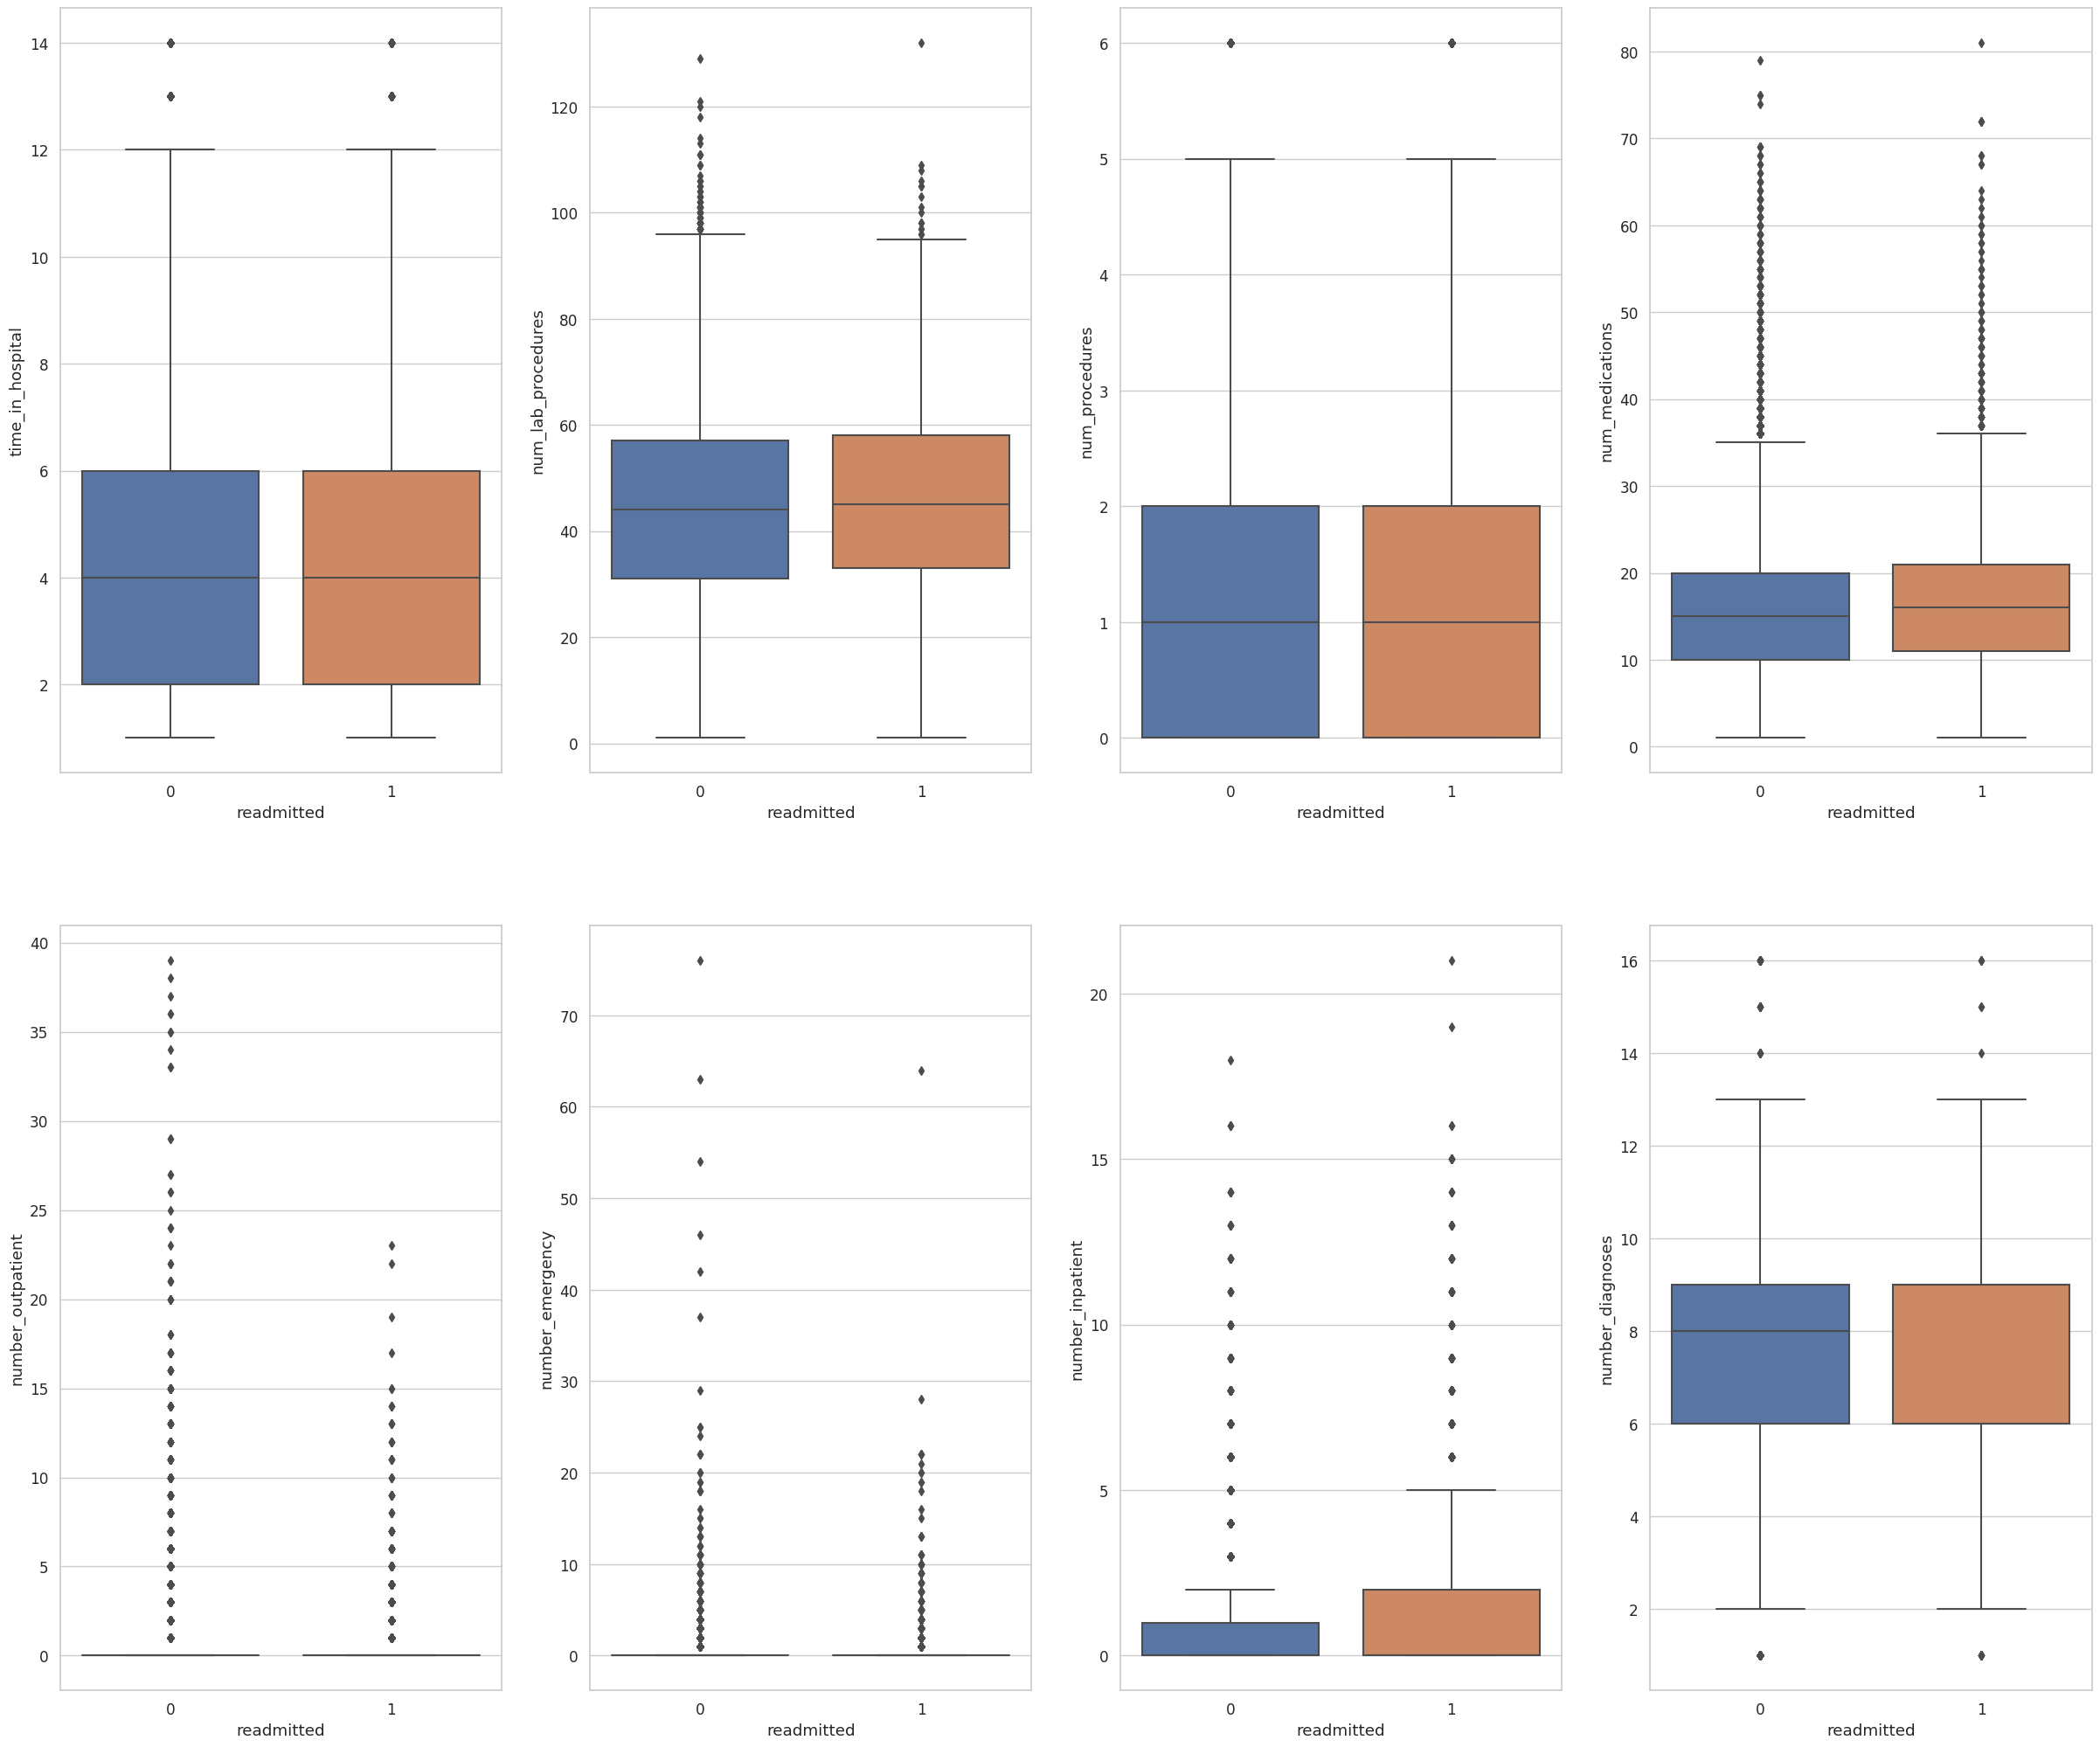

In [130]:
fig, ax = plt.subplots(2, 4, figsize=(30, 25))
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x=diabetes.readmitted, y=var, data=diabetes, ax=subplot)

In [131]:
# We can see that the number of inpatient visits in the year preceding the encounter is correlated with readmission.

/tmp/ipykernel_3209316/3390046692.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(diabetes.loc[(diabetes['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted within 30 days')
/tmp/ipykernel_3209316/3390046692.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(diabetes.loc[(diabetes['readmitted'] == 1),'time_in_hospital'] , color='g',shade=True, label='Readmitted in less than 30 days')


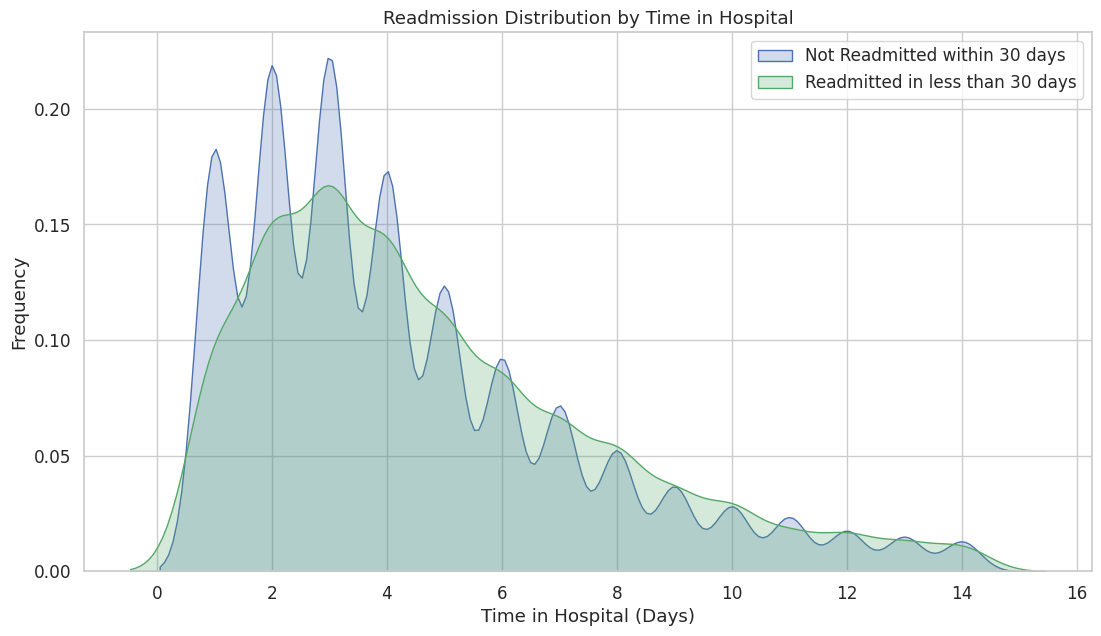

In [132]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(diabetes.loc[(diabetes['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted within 30 days')
ax=sns.kdeplot(diabetes.loc[(diabetes['readmitted'] == 1),'time_in_hospital'] , color='g',shade=True, label='Readmitted in less than 30 days')
ax.set(xlabel='Time in Hospital (Days)', ylabel='Frequency')
plt.title('Readmission Distribution by Time in Hospital')
plt.legend()

In [133]:
# Most patients stayed 2-3 days in the hospital.

Analysing categorical variables

In [134]:
# Now I'll analyze the values, distribution, and dispersion of categorical variables with bar plots.

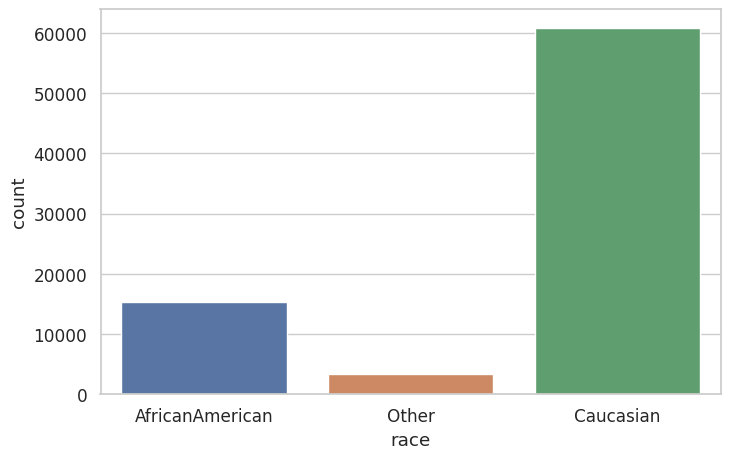

In [135]:
sns.countplot(x=diabetes.race, data = diabetes);

In [136]:
diabetes.race.value_counts(normalize = True)*100

race
Caucasian          76.476426
AfricanAmerican    19.276140
Other               4.247434
Name: proportion, dtype: float64

In [137]:
# We learn that most patients are Caucasian and are 76% of our data.
# African Americans are 19% of our data.
# 4% are Hispanic/ Asian/ other. I decided to call them "Other".

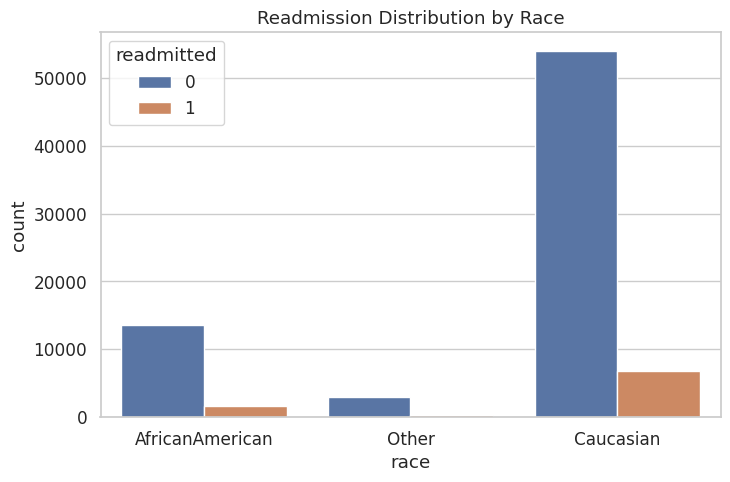

In [138]:
sns.countplot(x="race", hue= "readmitted", data = diabetes)
plt.title("Readmission Distribution by Race")
plt.show()

In [139]:
# We see that the Readmitted distribution is similar across Caucasian and African American.

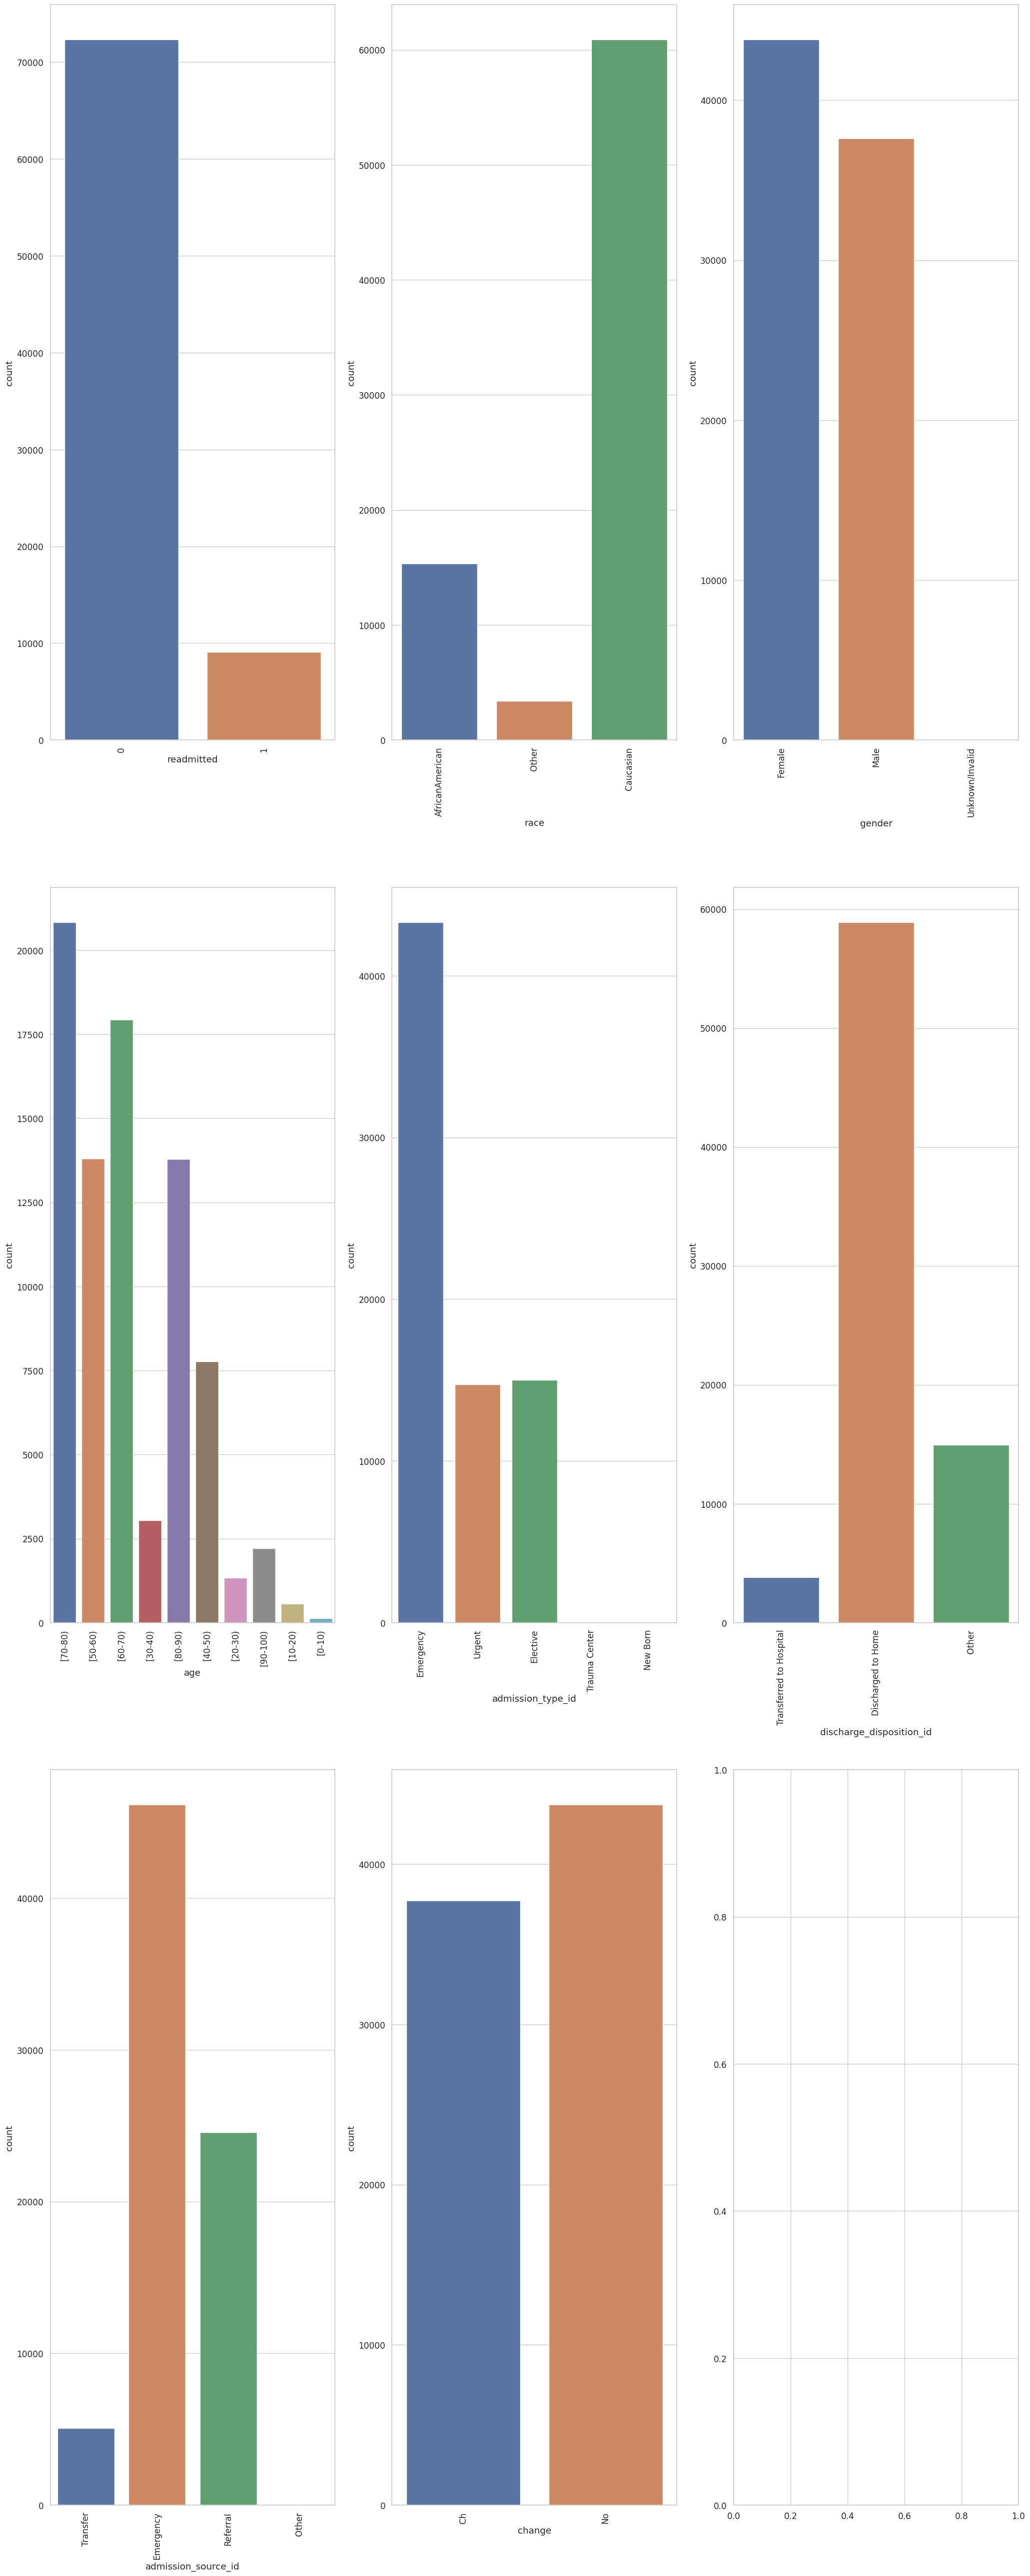

In [140]:
fig, ax = plt.subplots(3, 3, figsize=(25, 65))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=variable, data = diabetes, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [141]:
# Now I'll take a closer look at the gender.

In [142]:
diabetes.gender.value_counts() 

gender
Female             43784
Male               37625
Unknown/Invalid        3
Name: count, dtype: int64

In [143]:
# Let's drop the Unknown/Invalid category.

In [144]:
# diabetes = diabetes.drop(diabetes.loc[diabetes["gender"]=="Unknown/Invalid"].index, axis=0)

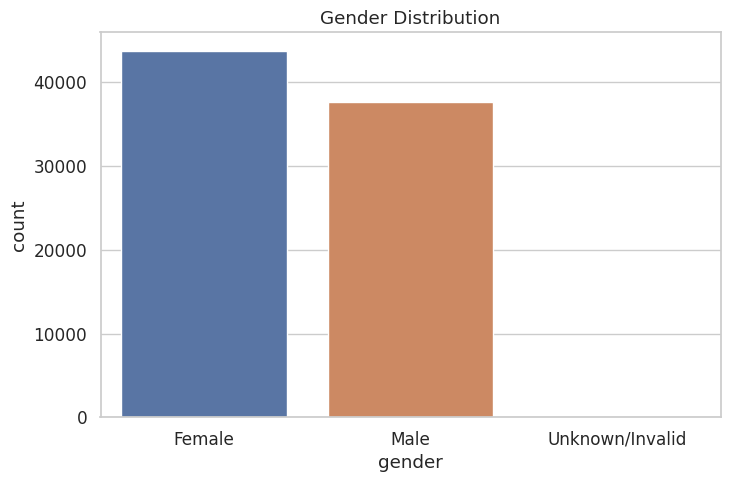

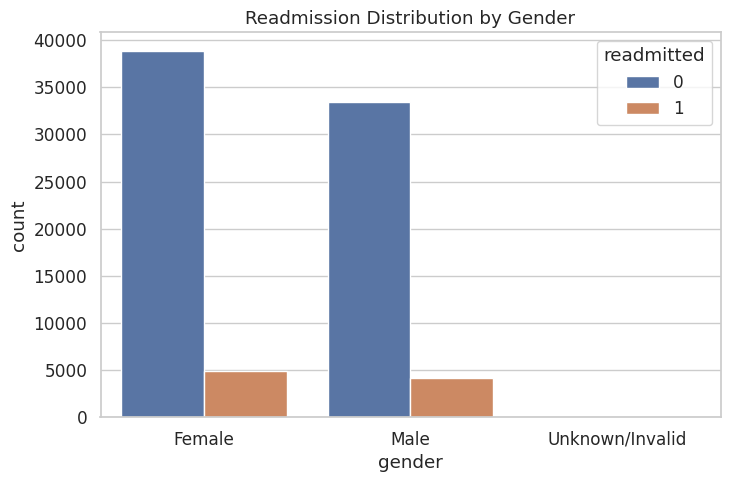

In [145]:
sns.countplot(x = "gender", data = diabetes)
plt.title("Gender Distribution")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = diabetes)
plt.title("Readmission Distribution by Gender")
plt.show()

In [146]:
# The distribution is pretty similar.

In [147]:
diabetes.groupby('gender')['readmitted'].value_counts()

gender           readmitted
Female           0             38887
                 1              4897
Male             0             33436
                 1              4189
Unknown/Invalid  0                 3
Name: count, dtype: int64

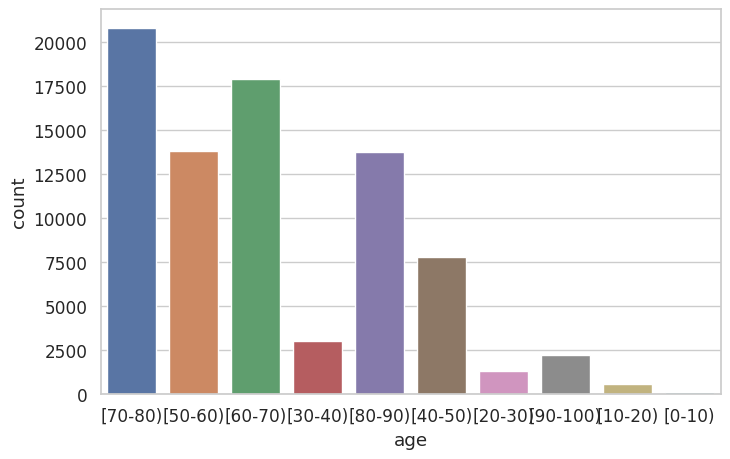

In [148]:
# Now I'll take a closer look at age.
sns.countplot(x=diabetes.age, data = diabetes);

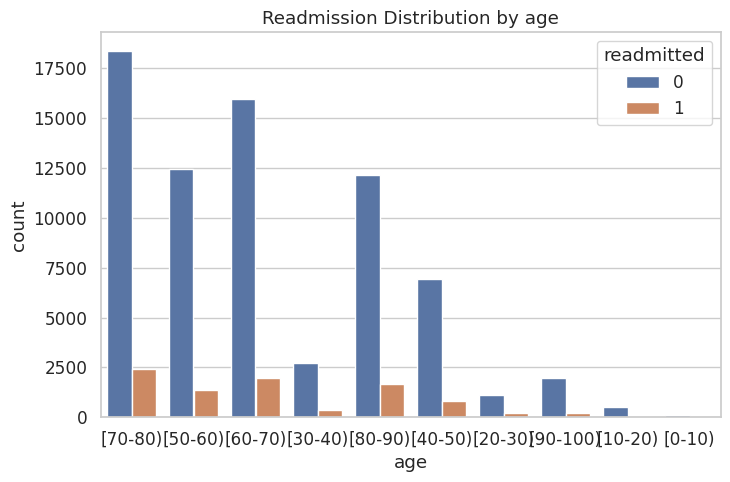

In [149]:
sns.countplot(x = "age", hue = "readmitted", data = diabetes)
plt.title("Readmission Distribution by age")
plt.show()

In [150]:
# weight has mostly NaN values! (97%) so I'm not looking at it.

In [151]:
# Now I'll take a closer look at the Admission Type ID.

In [152]:
admission_type_id_ids = ids[0:9]
admission_type_id_ids

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN


In [153]:
# I mapped Not Available, NULL, Not Mapped to NAN

In [154]:
diabetes.admission_type_id.value_counts(normalize=True)*100

admission_type_id
Emergency        59.252774
Elective         20.548039
Urgent           20.163618
Trauma Center     0.025993
New Born          0.009576
Name: proportion, dtype: float64

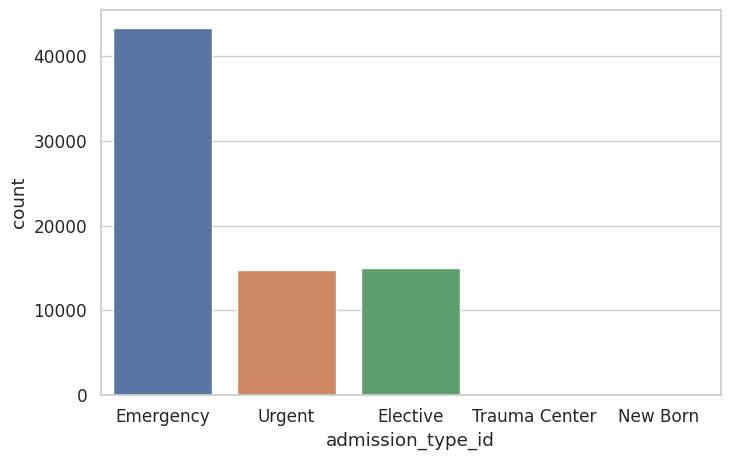

In [155]:
sns.countplot(x=diabetes.admission_type_id, data = diabetes);

In [156]:
diabetes.admission_type_id.value_counts()

admission_type_id
Emergency        43312
Elective         15020
Urgent           14739
Trauma Center       19
New Born             7
Name: count, dtype: int64

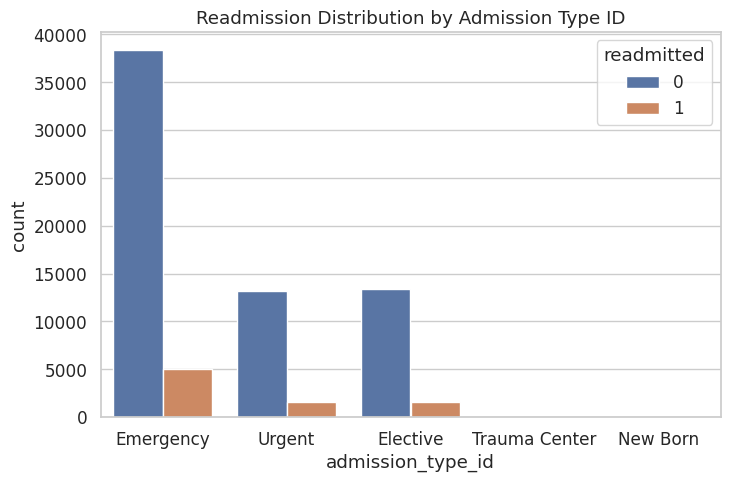

In [157]:
sns.countplot(x = "admission_type_id", hue = "readmitted", data = diabetes)
plt.title("Readmission Distribution by Admission Type ID")
plt.show()

In [158]:
# for admission_type_id "Emergency", the readmission is highest.

In [159]:
# Now I'll take a closer look at discharge_disposition_id.

In [160]:
discharge_disposition_id_ids = ids[9:41]
discharge_disposition_id_ids

,admission_type_id,description
9,discharge_disposition_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital


In [161]:
# I mapped all the values into 3 categories: Home (if it has the word "home") / Transferred to Hospital (if it has the word "hospital") / Other.
# Also, I changed to NAN the following values: NULL, Not Mapped, Unknown/Invalid.

<Axes: xlabel='discharge_disposition_id', ylabel='count'>

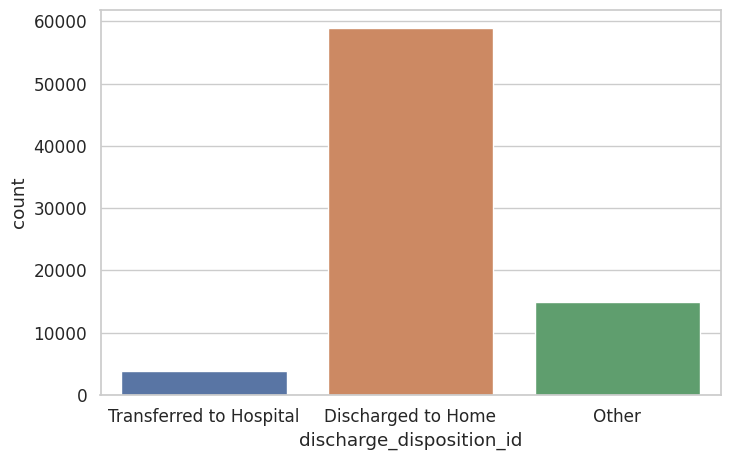

In [162]:
sns.countplot(x=diabetes.discharge_disposition_id, data = diabetes)

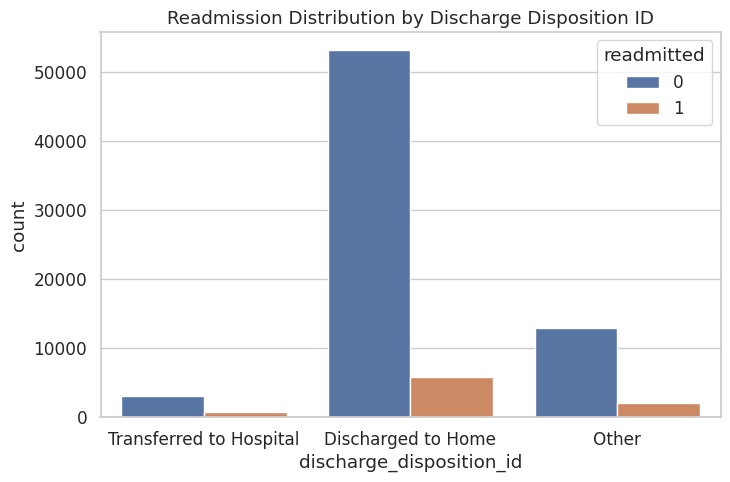

In [163]:
sns.countplot(x = "discharge_disposition_id", hue = "readmitted", data = diabetes)
plt.title("Readmission Distribution by Discharge Disposition ID")
plt.show()

In [164]:
# Now I'll take a closer look at admission_source_id.

In [165]:
admission_source_id_ids = ids[41:67]
admission_source_id_ids

,admission_type_id,description
41,admission_source_id,description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement
50,9,Not Available


In [166]:
# I mapped all the values into 4 categories: Emergency / Referral (if it has the word "Referral") / Transfer (if it has the word "Transfer") / Other.
# Also, I changed to NAN the following values: Not Available, Not Mapped, Unknown/Invalid.

<Axes: xlabel='admission_source_id', ylabel='count'>

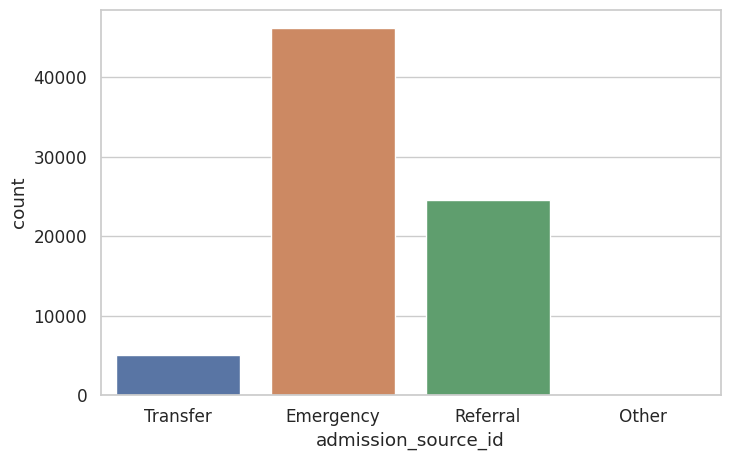

In [167]:
sns.countplot(x=diabetes.admission_source_id, data = diabetes)

In [168]:
diabetes.admission_source_id.value_counts(normalize=True)*100

admission_source_id
Emergency    60.890965
Referral     32.389850
Transfer      6.703350
Other         0.015835
Name: proportion, dtype: float64

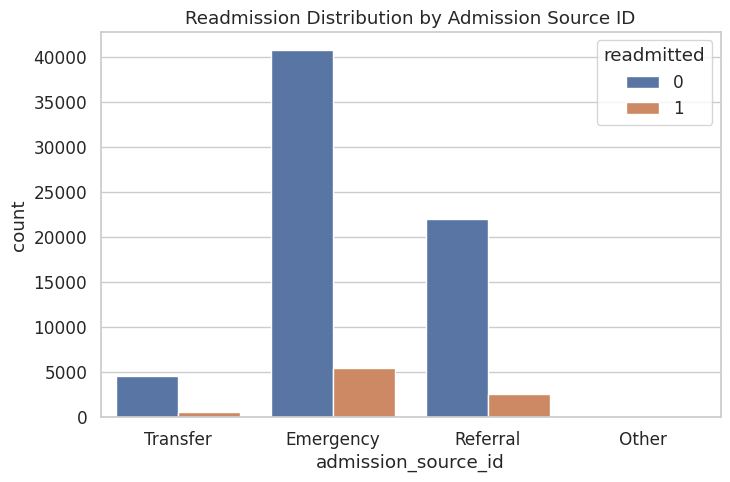

In [169]:
sns.countplot(x = "admission_source_id", hue = "readmitted", data = diabetes)
plt.title("Readmission Distribution by Admission Source ID")
plt.show()

<Axes: xlabel='change', ylabel='count'>

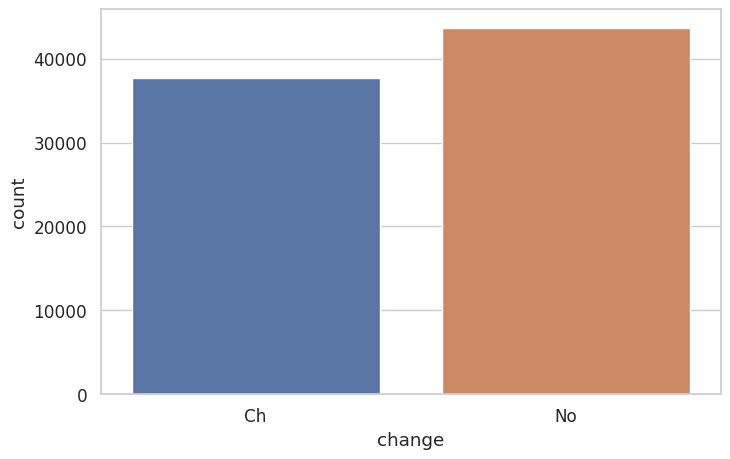

In [170]:
# Now I'll take a closer look at change in diabetic medications (either dosage or type of medication).
sns.countplot(x=diabetes.change, data = diabetes)

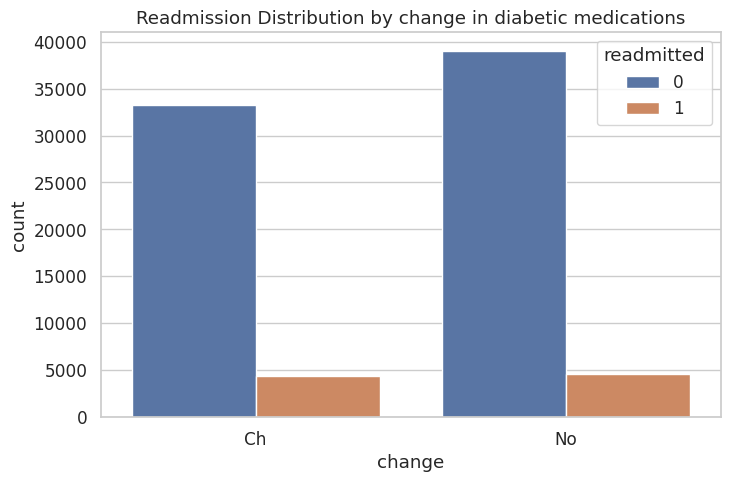

In [171]:
sns.countplot(x = "change", hue = "readmitted", data = diabetes)
plt.title("Readmission Distribution by change in diabetic medications")
plt.show()

In [172]:
# payor_code and medical_specialty were mostly missing values so I didn't look at them.